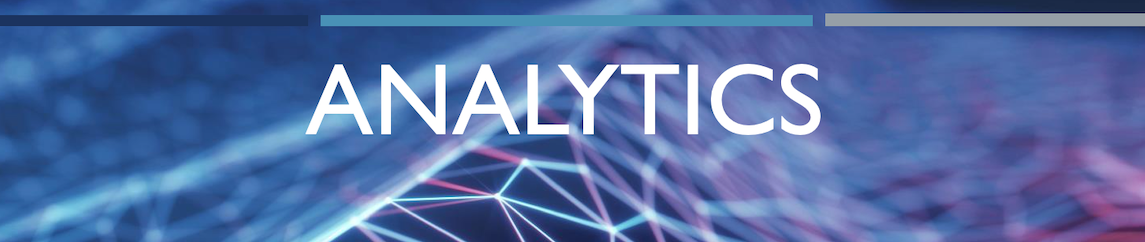

## MONITORING HUMAN ACTIVITIES WITH IoT DATA.

In this project we want to monitor and analysis human activities with sensors data collected through an android devise.

Accelerometer, Linear Accelerometer, magnetometer and Gyroscope are inbuilt sensors that was used to gathered the dataset. The two activies which was carried out when the data was collected are:

- Sitting on the table
- when shaking 


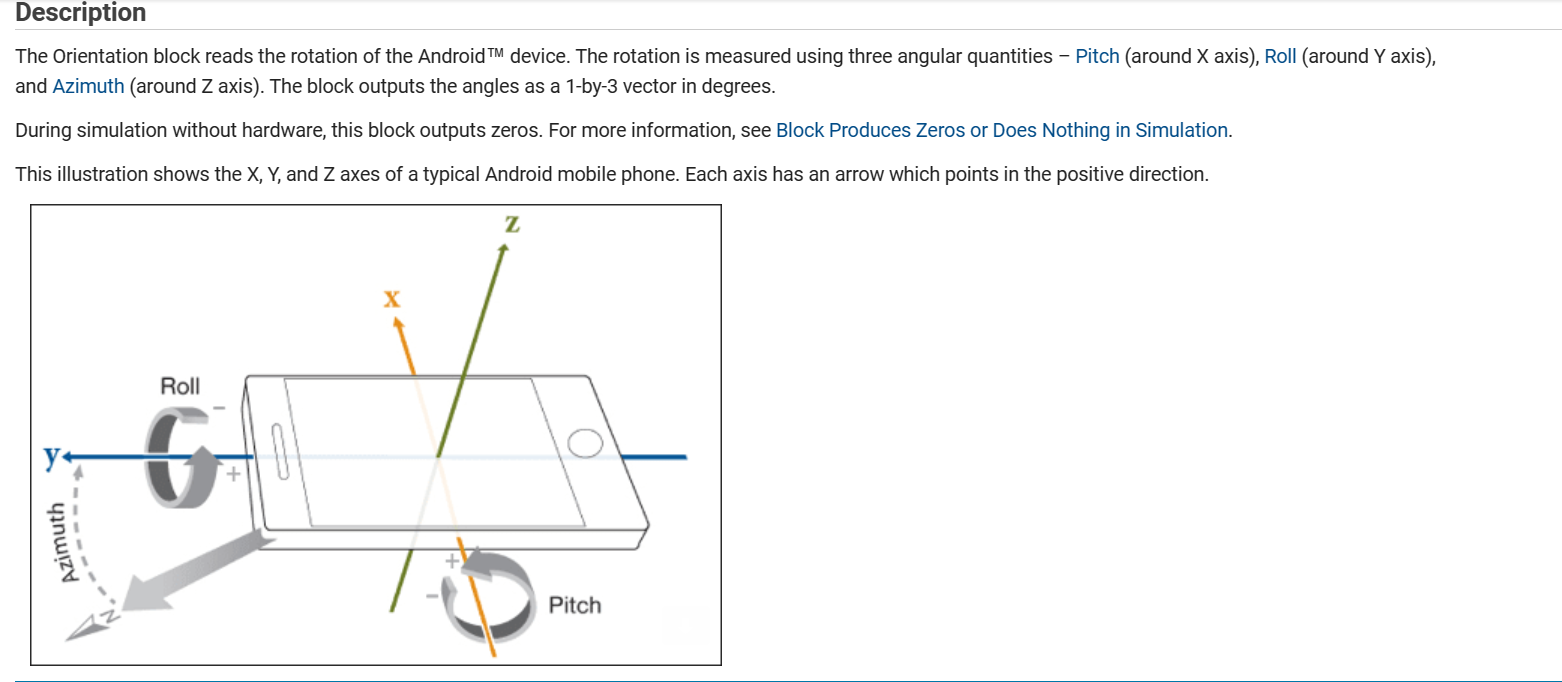

## Importing Libraries 

In [1]:
#We import all neccessary libraries that's needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Load in all Data for "On Table Activity"

In [3]:
on_tab_Acc = pd.read_csv('OnTable/Accelerometer.csv')
on_tab_Lnr = pd.read_csv('OnTable/Linear Accelerometer.csv')
on_tab_Mag = pd.read_csv('OnTable/Magnetometer.csv')
on_tab_Gro = pd.read_csv('OnTable/Gyroscope.csv')



## Check the head of the dataframe

In [4]:
#Check the first 5 rows of the data
on_tab_Acc.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.002279,0.127385,-0.057181,9.709858
1,0.012258,0.127535,-0.057181,9.704469
2,0.022268,0.139510,-0.059426,9.682465
3,0.032278,0.122595,-0.052092,9.661509
4,0.042288,0.118104,-0.055984,9.664503


In [5]:
#Check the first 5 rows of the data
on_tab_Lnr.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.166555,-0.007494,0.000629,-0.168462
1,0.176595,-0.007571,0.002784,-0.165166
2,0.186605,-0.010683,0.006142,-0.159775
3,0.196646,-0.004453,0.013248,-0.168456
4,0.206655,-0.001837,0.005209,-0.163216


In [6]:
#Check the first 5 rows of the data
on_tab_Gro.head()

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.166555,-0.005071,-0.000746,0.000124
1,0.176595,-0.004969,-0.001855,0.000620
2,0.186605,0.000723,-0.005076,0.001629
3,0.196646,0.000824,-0.000616,0.001135
4,0.206655,0.004653,-0.001608,0.001549


In [7]:
#Check the first 5 rows of the data
on_tab_Mag.head()

,Time (s),X (µT),Y (µT),Z (µT)
0,0.166555,-6.442471,-22.302940,-76.284790
1,0.176595,-6.442471,-22.302940,-76.284790
2,0.186605,-6.317364,-22.165016,-76.000549
3,0.196646,-6.317364,-22.165016,-76.000549
4,0.206655,-6.220921,-21.970707,-76.216858


## Data Preprocessing


## Renaming column Headers for `on_tab_Acc` Data frame

In [8]:
on_tab_Acc.columns

Index(['Time (s)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], dtype='object')

In [9]:
on_tab_Acc.rename(columns= {'Time (s)': 'Time', 'X (m/s^2)':'Acc_X', 'Y (m/s^2)':'Acc_Y', 'Z (m/s^2)':'Acc_Z'}, inplace=True)

In [10]:
on_tab_Acc.columns

Index(['Time', 'Acc_X', 'Acc_Y', 'Acc_Z'], dtype='object')

## Renaming column Headers for `on_tab_Lnr` Dataframe

In [11]:
on_tab_Lnr.columns

Index(['Time (s)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], dtype='object')

In [12]:
on_tab_Lnr.rename(columns={'X (m/s^2)':'_LnAcc_X', 'Y (m/s^2)':'Ln_Acc_Y', 'Z (m/s^2)':'Ln_Acc_Z'}, inplace=True)

In [13]:
on_tab_Lnr.columns

Index(['Time (s)', 'Ln_Acc_X', 'Ln_Acc_Y', 'Ln_Acc_Z'], dtype='object')

 ## Renaming column Headers for `on_tab_Gro` Dataframe

In [14]:
on_tab_Gro.columns

Index(['Time (s)', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'], dtype='object')

In [15]:
on_tab_Gro.rename(columns={'X (rad/s)':'Gro_X', 'Y (rad/s)':'Gro_Y', 'Z (rad/s)':'Gro_Z'},inplace=True)

In [16]:
on_tab_Gro.columns

Index(['Time (s)', 'Gro_X', 'Gro_Y', 'Gro_Z'], dtype='object')

 ## Renaming column Headers for `on_tab_Mag` Dataframe

In [17]:
on_tab_Mag.columns

Index(['Time (s)', 'X (µT)', 'Y (µT)', 'Z (µT)'], dtype='object')

In [18]:
on_tab_Mag.rename(columns={'X (µT)':'Mag_X', 'Y (µT)':'Mag_Y', 'Z (µT)':'Mag_Z'}, inplace=True)

In [19]:
on_tab_Mag.columns

Index(['Time (s)', 'Mag_X', 'Mag_Y', 'Mag_Z'], dtype='object')

## Drop all timestamps in Magnetic, Linear Acceleration and Gyroscope Dataframes; However, leave "Timestamp" for the Acceleration dataframe

In [20]:
on_tab_Lnr = on_tab_Lnr.drop('Time (s)',axis=1)
on_tab_Mag = on_tab_Mag.drop('Time (s)',axis=1)
on_tab_Gro = on_tab_Gro.drop('Time (s)',axis=1)

## Combine all dataframes related to this specific activity 

In [21]:
frames = [on_tab_Acc,on_tab_Lnr,on_tab_Mag,on_tab_Gro]

In [22]:
on_Table_Activty = pd.concat(frames,axis=1)

In [23]:
on_Table_Activty.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z
0,0.002279,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.302940,-76.284790,-0.005071,-0.000746,0.000124
1,0.012258,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.302940,-76.284790,-0.004969,-0.001855,0.000620
2,0.022268,0.139510,-0.059426,9.682465,-0.010683,0.006142,-0.159775,-6.317364,-22.165016,-76.000549,0.000723,-0.005076,0.001629
3,0.032278,0.122595,-0.052092,9.661509,-0.004453,0.013248,-0.168456,-6.317364,-22.165016,-76.000549,0.000824,-0.000616,0.001135
4,0.042288,0.118104,-0.055984,9.664503,-0.001837,0.005209,-0.163216,-6.220921,-21.970707,-76.216858,0.004653,-0.001608,0.001549


## Create a new Column called "Activity" and assign the correct activity name to the newly created combined dataframe

In [24]:
on_Table_Activty['Activity'] = 'On_Table'

In [25]:
on_Table_Activty.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
0,0.002279,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.302940,-76.284790,-0.005071,-0.000746,0.000124,On_Table
1,0.012258,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.302940,-76.284790,-0.004969,-0.001855,0.000620,On_Table
2,0.022268,0.139510,-0.059426,9.682465,-0.010683,0.006142,-0.159775,-6.317364,-22.165016,-76.000549,0.000723,-0.005076,0.001629,On_Table
3,0.032278,0.122595,-0.052092,9.661509,-0.004453,0.013248,-0.168456,-6.317364,-22.165016,-76.000549,0.000824,-0.000616,0.001135,On_Table
4,0.042288,0.118104,-0.055984,9.664503,-0.001837,0.005209,-0.163216,-6.220921,-21.970707,-76.216858,0.004653,-0.001608,0.001549,On_Table


In [26]:
#Information about the entries of the dataset
on_Table_Activty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      5841 non-null   float64
 1   Acc_X     5841 non-null   float64
 2   Acc_Y     5841 non-null   float64
 3   Acc_Z     5841 non-null   float64
 4   Ln_Acc_X  5825 non-null   float64
 5   Ln_Acc_Y  5825 non-null   float64
 6   Ln_Acc_Z  5825 non-null   float64
 7   Mag_X     5825 non-null   float64
 8   Mag_Y     5825 non-null   float64
 9   Mag_Z     5825 non-null   float64
 10  Gro_X     5825 non-null   float64
 11  Gro_Y     5825 non-null   float64
 12  Gro_Z     5825 non-null   float64
 13  Activity  5841 non-null   object 
dtypes: float64(13), object(1)
memory usage: 639.0+ KB


## Checking for missing values in `on_Table_Activty`

In [27]:
on_Table_Activty.isnull().sum()

Time         0
Acc_X        0
Acc_Y        0
Acc_Z        0
Ln_Acc_X    16
Ln_Acc_Y    16
Ln_Acc_Z    16
Mag_X       16
Mag_Y       16
Mag_Z       16
Gro_X       16
Gro_Y       16
Gro_Z       16
Activity     0
dtype: int64

### Droping the missing values in `on_Table_Activty`

In [28]:
on_Table_Activty.dropna(inplace=True)

In [29]:
on_Table_Activty.isnull().sum()

Time        0
Acc_X       0
Acc_Y       0
Acc_Z       0
Ln_Acc_X    0
Ln_Acc_Y    0
Ln_Acc_Z    0
Mag_X       0
Mag_Y       0
Mag_Z       0
Gro_X       0
Gro_Y       0
Gro_Z       0
Activity    0
dtype: int64

## Loading Shaking Activity

In [30]:
shake_Acc = pd.read_csv('Shake/Accelerometer.csv')
shake_Lnr = pd.read_csv('Shake/Linear Accelerometer.csv')
shake_Mag = pd.read_csv('Shake/Magnetometer.csv')
shake_Gro = pd.read_csv('Shake/Gyroscope.csv')



## Check the head of the dataframe

In [31]:
shake_Acc.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.002583,0.225880,-0.107327,9.716894
1,0.012562,0.207618,-0.102088,9.726025
2,0.022541,0.213157,-0.079784,9.714050
3,0.032551,0.198637,-0.099244,9.681567
4,0.042591,0.204924,-0.102686,9.675580


In [32]:
shake_Lnr.head()

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.158833,0.006531,0.004347,-0.153044
1,0.168843,0.002026,0.010572,-0.144662
2,0.178883,-0.003215,0.005768,-0.141372
3,0.188893,-0.002633,-0.000334,-0.141373
4,0.198902,-0.001154,-0.000373,-0.144967


In [33]:
shake_Gro.head()

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.158833,0.000585,0.000123,0.000179
1,0.168843,-0.001380,-0.000242,0.000428
2,0.178883,0.001961,0.001397,-0.000433
3,0.188893,-0.000699,0.000286,0.000396
4,0.198902,0.003042,-0.000214,-0.001283


In [34]:
shake_Mag.head()

,Time (s),X (µT),Y (µT),Z (µT)
0,0.158833,-25.928158,-44.809967,-60.944458
1,0.168843,-25.928158,-44.809967,-60.944458
2,0.178883,-25.738834,-44.699173,-60.716736
3,0.188893,-25.738834,-44.699173,-60.716736
4,0.198902,-25.532066,-44.936394,-60.753967



## Renaming column Headers for `shake_Acc` Data frame

In [35]:
shake_Acc.columns

Index(['Time (s)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], dtype='object')

In [36]:
shake_Acc.rename(columns= {'Time (s)': 'Time', 'X (m/s^2)':'Acc_X', 'Y (m/s^2)':'Acc_Y', 'Z (m/s^2)':'Acc_Z'}, inplace=True)

In [37]:
shake_Acc.columns

Index(['Time', 'Acc_X', 'Acc_Y', 'Acc_Z'], dtype='object')

## Renaming column Headers for `shake_Lnr` Dataframe

In [38]:
shake_Lnr.columns

Index(['Time (s)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'], dtype='object')

In [39]:
shake_Lnr.rename(columns={'X (m/s^2)':'Ln_Acc_X', 'Y (m/s^2)':'Ln_Acc_Y', 'Z (m/s^2)':'Ln_Acc_Z'}, inplace=True)

In [40]:
shake_Lnr.columns

Index(['Time (s)', 'Ln_Acc_X', 'Ln_Acc_Y', 'Ln_Acc_Z'], dtype='object')

 ## Renaming column Headers for `on_tab_Gro` Dataframe

In [41]:
shake_Gro.columns

Index(['Time (s)', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'], dtype='object')

In [42]:
shake_Gro.rename(columns={'X (rad/s)':'Gro_X', 'Y (rad/s)':'Gro_Y', 'Z (rad/s)':'Gro_Z'},inplace=True)

In [43]:
shake_Gro.columns

Index(['Time (s)', 'Gro_X', 'Gro_Y', 'Gro_Z'], dtype='object')

 ## Renaming column Headers for `shake_Mag` Dataframe

In [44]:
shake_Mag.columns

Index(['Time (s)', 'X (µT)', 'Y (µT)', 'Z (µT)'], dtype='object')

In [45]:
shake_Mag.rename(columns={'X (µT)':'Mag_X', 'Y (µT)':'Mag_Y', 'Z (µT)':'Mag_Z'}, inplace=True)

In [46]:
shake_Mag.columns

Index(['Time (s)', 'Mag_X', 'Mag_Y', 'Mag_Z'], dtype='object')

### Drop all timestamps in Magnetic, Linear Acceleration and Gyroscope Dataframes; However, leave "Timestamp" for the Acceleration dataframe

In [47]:
shake_Lnr = shake_Lnr.drop('Time (s)',axis=1)
shake_Mag = shake_Mag.drop('Time (s)',axis=1)
shake_Gro = shake_Gro.drop('Time (s)',axis=1)

### Combine all dataframes related to this specific activity 

In [48]:
frames = [shake_Acc,shake_Lnr,shake_Mag,shake_Gro]

In [49]:
shake_Activty = pd.concat(frames,axis=1)

In [50]:
shake_Activty.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z
0,0.002583,0.225880,-0.107327,9.716894,0.006531,0.004347,-0.153044,-25.928158,-44.809967,-60.944458,0.000585,0.000123,0.000179
1,0.012562,0.207618,-0.102088,9.726025,0.002026,0.010572,-0.144662,-25.928158,-44.809967,-60.944458,-0.001380,-0.000242,0.000428
2,0.022541,0.213157,-0.079784,9.714050,-0.003215,0.005768,-0.141372,-25.738834,-44.699173,-60.716736,0.001961,0.001397,-0.000433
3,0.032551,0.198637,-0.099244,9.681567,-0.002633,-0.000334,-0.141373,-25.738834,-44.699173,-60.716736,-0.000699,0.000286,0.000396
4,0.042591,0.204924,-0.102686,9.675580,-0.001154,-0.000373,-0.144967,-25.532066,-44.936394,-60.753967,0.003042,-0.000214,-0.001283


### Create a new Column called "Activity" and assign the correct activity name to the newly created combined dataframe

In [51]:
shake_Activty['Activity'] = 'shaking'

In [52]:
shake_Activty.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
0,0.002583,0.225880,-0.107327,9.716894,0.006531,0.004347,-0.153044,-25.928158,-44.809967,-60.944458,0.000585,0.000123,0.000179,shaking
1,0.012562,0.207618,-0.102088,9.726025,0.002026,0.010572,-0.144662,-25.928158,-44.809967,-60.944458,-0.001380,-0.000242,0.000428,shaking
2,0.022541,0.213157,-0.079784,9.714050,-0.003215,0.005768,-0.141372,-25.738834,-44.699173,-60.716736,0.001961,0.001397,-0.000433,shaking
3,0.032551,0.198637,-0.099244,9.681567,-0.002633,-0.000334,-0.141373,-25.738834,-44.699173,-60.716736,-0.000699,0.000286,0.000396,shaking
4,0.042591,0.204924,-0.102686,9.675580,-0.001154,-0.000373,-0.144967,-25.532066,-44.936394,-60.753967,0.003042,-0.000214,-0.001283,shaking


In [53]:
shake_Activty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      3249 non-null   float64
 1   Acc_X     3249 non-null   float64
 2   Acc_Y     3249 non-null   float64
 3   Acc_Z     3249 non-null   float64
 4   Ln_Acc_X  3233 non-null   float64
 5   Ln_Acc_Y  3233 non-null   float64
 6   Ln_Acc_Z  3233 non-null   float64
 7   Mag_X     3233 non-null   float64
 8   Mag_Y     3233 non-null   float64
 9   Mag_Z     3233 non-null   float64
 10  Gro_X     3233 non-null   float64
 11  Gro_Y     3233 non-null   float64
 12  Gro_Z     3233 non-null   float64
 13  Activity  3249 non-null   object 
dtypes: float64(13), object(1)
memory usage: 355.5+ KB


# Checking for missing values in `shake_Activty`

In [54]:
shake_Activty.isnull().sum()

Time         0
Acc_X        0
Acc_Y        0
Acc_Z        0
Ln_Acc_X    16
Ln_Acc_Y    16
Ln_Acc_Z    16
Mag_X       16
Mag_Y       16
Mag_Z       16
Gro_X       16
Gro_Y       16
Gro_Z       16
Activity     0
dtype: int64

In [55]:
shake_Activty.dropna(inplace=True)

In [56]:
shake_Activty.isnull().sum()

Time        0
Acc_X       0
Acc_Y       0
Acc_Z       0
Ln_Acc_X    0
Ln_Acc_Y    0
Ln_Acc_Z    0
Mag_X       0
Mag_Y       0
Mag_Z       0
Gro_X       0
Gro_Y       0
Gro_Z       0
Activity    0
dtype: int64

# Combine all the Activities to Create a Master Data

In [57]:
shake_Activty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      3233 non-null   float64
 1   Acc_X     3233 non-null   float64
 2   Acc_Y     3233 non-null   float64
 3   Acc_Z     3233 non-null   float64
 4   Ln_Acc_X  3233 non-null   float64
 5   Ln_Acc_Y  3233 non-null   float64
 6   Ln_Acc_Z  3233 non-null   float64
 7   Mag_X     3233 non-null   float64
 8   Mag_Y     3233 non-null   float64
 9   Mag_Z     3233 non-null   float64
 10  Gro_X     3233 non-null   float64
 11  Gro_Y     3233 non-null   float64
 12  Gro_Z     3233 non-null   float64
 13  Activity  3233 non-null   object 
dtypes: float64(13), object(1)
memory usage: 378.9+ KB


In [58]:
on_Table_Activty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5825 entries, 0 to 5824
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      5825 non-null   float64
 1   Acc_X     5825 non-null   float64
 2   Acc_Y     5825 non-null   float64
 3   Acc_Z     5825 non-null   float64
 4   Ln_Acc_X  5825 non-null   float64
 5   Ln_Acc_Y  5825 non-null   float64
 6   Ln_Acc_Z  5825 non-null   float64
 7   Mag_X     5825 non-null   float64
 8   Mag_Y     5825 non-null   float64
 9   Mag_Z     5825 non-null   float64
 10  Gro_X     5825 non-null   float64
 11  Gro_Y     5825 non-null   float64
 12  Gro_Z     5825 non-null   float64
 13  Activity  5825 non-null   object 
dtypes: float64(13), object(1)
memory usage: 682.6+ KB


****************************

## Combining both Activities

In [59]:
frames3 = [on_Table_Activty,shake_Activty]

In [60]:
df_master_grp = pd.concat(frames3,axis=0)

In [61]:
df_master_grp.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
0,0.002279,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.302940,-76.284790,-0.005071,-0.000746,0.000124,On_Table
1,0.012258,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.302940,-76.284790,-0.004969,-0.001855,0.000620,On_Table
2,0.022268,0.139510,-0.059426,9.682465,-0.010683,0.006142,-0.159775,-6.317364,-22.165016,-76.000549,0.000723,-0.005076,0.001629,On_Table
3,0.032278,0.122595,-0.052092,9.661509,-0.004453,0.013248,-0.168456,-6.317364,-22.165016,-76.000549,0.000824,-0.000616,0.001135,On_Table
4,0.042288,0.118104,-0.055984,9.664503,-0.001837,0.005209,-0.163216,-6.220921,-21.970707,-76.216858,0.004653,-0.001608,0.001549,On_Table


In [62]:
df_master_grp.tail()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
3228,32.350737,0.160915,-0.120350,9.704769,0.028009,-0.076359,-0.086919,14.906219,-27.324234,-51.273529,0.000546,0.002178,0.000679,shaking
3229,32.360747,0.159568,-0.121248,9.720786,0.022993,-0.066356,-0.094400,14.906219,-27.324234,-51.273529,-0.000448,-0.000413,-0.001187,shaking
3230,32.370787,0.154479,-0.110021,9.713301,0.019681,-0.077164,-0.083468,14.932178,-27.356922,-51.330139,0.002033,0.002952,-0.000755,shaking
3231,32.380797,0.155826,-0.104932,9.716594,0.028963,-0.072455,-0.093345,14.932178,-27.356922,-51.330139,0.004068,0.001580,0.001543,shaking
3232,32.390837,0.163011,-0.109722,9.713002,0.022584,-0.071650,-0.097233,15.020798,-27.149363,-51.395599,0.000692,-0.003262,0.001292,shaking


## Reseting the index

In [63]:
df_master_grp = df_master_grp.reset_index()

In [64]:
df_master_grp.tail()

,index,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
9053,3228,32.350737,0.160915,-0.120350,9.704769,0.028009,-0.076359,-0.086919,14.906219,-27.324234,-51.273529,0.000546,0.002178,0.000679,shaking
9054,3229,32.360747,0.159568,-0.121248,9.720786,0.022993,-0.066356,-0.094400,14.906219,-27.324234,-51.273529,-0.000448,-0.000413,-0.001187,shaking
9055,3230,32.370787,0.154479,-0.110021,9.713301,0.019681,-0.077164,-0.083468,14.932178,-27.356922,-51.330139,0.002033,0.002952,-0.000755,shaking
9056,3231,32.380797,0.155826,-0.104932,9.716594,0.028963,-0.072455,-0.093345,14.932178,-27.356922,-51.330139,0.004068,0.001580,0.001543,shaking
9057,3232,32.390837,0.163011,-0.109722,9.713002,0.022584,-0.071650,-0.097233,15.020798,-27.149363,-51.395599,0.000692,-0.003262,0.001292,shaking


In [65]:
df_master_grp['Activity'].unique()

array(['On_Table', 'shaking'], dtype=object)

In [66]:
df_master_grp = df_master_grp.drop('index',axis=1)

In [67]:
df_master_grp.tail()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity
9053,32.350737,0.160915,-0.120350,9.704769,0.028009,-0.076359,-0.086919,14.906219,-27.324234,-51.273529,0.000546,0.002178,0.000679,shaking
9054,32.360747,0.159568,-0.121248,9.720786,0.022993,-0.066356,-0.094400,14.906219,-27.324234,-51.273529,-0.000448,-0.000413,-0.001187,shaking
9055,32.370787,0.154479,-0.110021,9.713301,0.019681,-0.077164,-0.083468,14.932178,-27.356922,-51.330139,0.002033,0.002952,-0.000755,shaking
9056,32.380797,0.155826,-0.104932,9.716594,0.028963,-0.072455,-0.093345,14.932178,-27.356922,-51.330139,0.004068,0.001580,0.001543,shaking
9057,32.390837,0.163011,-0.109722,9.713002,0.022584,-0.071650,-0.097233,15.020798,-27.149363,-51.395599,0.000692,-0.003262,0.001292,shaking


In [68]:
df_master_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      9058 non-null   float64
 1   Acc_X     9058 non-null   float64
 2   Acc_Y     9058 non-null   float64
 3   Acc_Z     9058 non-null   float64
 4   Ln_Acc_X  9058 non-null   float64
 5   Ln_Acc_Y  9058 non-null   float64
 6   Ln_Acc_Z  9058 non-null   float64
 7   Mag_X     9058 non-null   float64
 8   Mag_Y     9058 non-null   float64
 9   Mag_Z     9058 non-null   float64
 10  Gro_X     9058 non-null   float64
 11  Gro_Y     9058 non-null   float64
 12  Gro_Z     9058 non-null   float64
 13  Activity  9058 non-null   object 
dtypes: float64(13), object(1)
memory usage: 990.8+ KB


## Data Visualizations

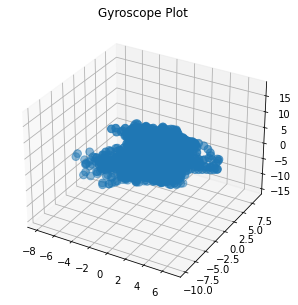

In [69]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_master_grp['Gro_Z']
xline = df_master_grp['Gro_X']
yline = df_master_grp['Gro_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Gyroscope Plot')
plt.show()

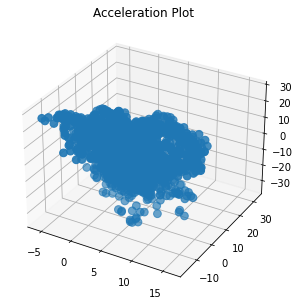

In [70]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_master_grp['Acc_X']
xline = df_master_grp['Acc_Y']
yline = df_master_grp['Acc_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

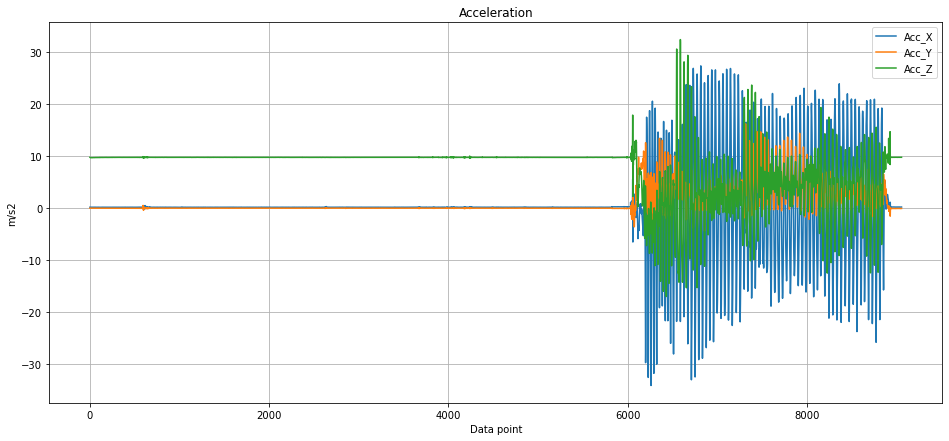

In [71]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

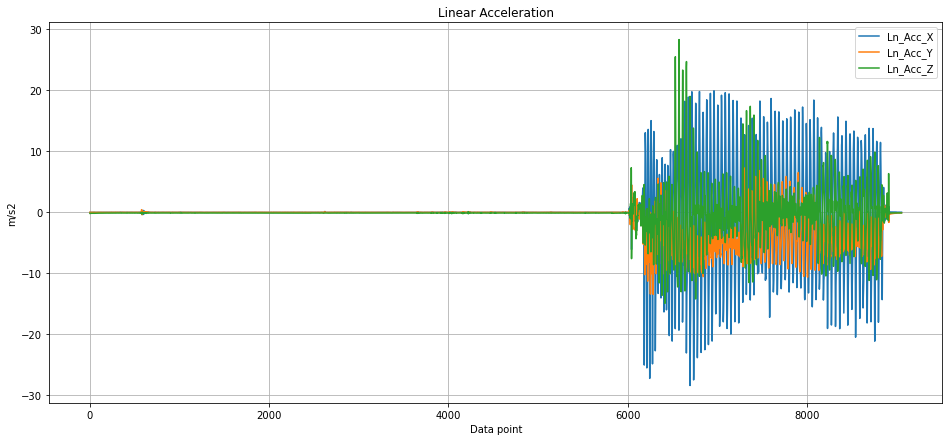

In [72]:
title='Linear Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_master_grp['Ln_Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Ln_Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_master_grp['Ln_Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

### Exporting to csv

In [73]:
df_master_grp.to_csv('grouped_Activities.csv',index=False)

In [74]:
df_master = pd.read_csv('grouped_Activities.csv')

__________

# Encoding Categorical Data
>### Label Encoding the "Activity" column

In [75]:
#Transformed and rename the activity column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_master['Activity_class'] = le.fit_transform(df_master['Activity'])

In [76]:
df_master.head()

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity,Activity_class
0,0.002279,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.302940,-76.284790,-0.005071,-0.000746,0.000124,On_Table,0
1,0.012258,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.302940,-76.284790,-0.004969,-0.001855,0.000620,On_Table,0
2,0.022268,0.139510,-0.059426,9.682465,-0.010683,0.006142,-0.159775,-6.317364,-22.165016,-76.000549,0.000723,-0.005076,0.001629,On_Table,0
3,0.032278,0.122595,-0.052092,9.661509,-0.004453,0.013248,-0.168456,-6.317364,-22.165016,-76.000549,0.000824,-0.000616,0.001135,On_Table,0
4,0.042288,0.118104,-0.055984,9.664503,-0.001837,0.005209,-0.163216,-6.220921,-21.970707,-76.216858,0.004653,-0.001608,0.001549,On_Table,0


In [77]:
df_master['Activity_class'].value_counts()

0    5825
1    3233
Name: Activity_class, dtype: int64

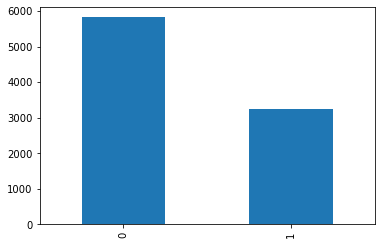

In [78]:
df_master['Activity_class'].value_counts().plot(kind='bar');

## Selecting values for X and y

In [79]:
df_master.head(2)

,Time,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z,Activity,Activity_class
0,0.002279,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.30294,-76.28479,-0.005071,-0.000746,0.000124,On_Table,0
1,0.012258,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.30294,-76.28479,-0.004969,-0.001855,0.000620,On_Table,0


In [86]:
X = df_master.drop(['Time','Activity', 'Activity_class'], axis=1)

In [87]:
X

,Acc_X,Acc_Y,Acc_Z,Ln_Acc_X,Ln_Acc_Y,Ln_Acc_Z,Mag_X,Mag_Y,Mag_Z,Gro_X,Gro_Y,Gro_Z
0,0.127385,-0.057181,9.709858,-0.007494,0.000629,-0.168462,-6.442471,-22.302940,-76.284790,-0.005071,-0.000746,0.000124
1,0.127535,-0.057181,9.704469,-0.007571,0.002784,-0.165166,-6.442471,-22.302940,-76.284790,-0.004969,-0.001855,0.000620
2,0.139510,-0.059426,9.682465,-0.010683,0.006142,-0.159775,-6.317364,-22.165016,-76.000549,0.000723,-0.005076,0.001629
3,0.122595,-0.052092,9.661509,-0.004453,0.013248,-0.168456,-6.317364,-22.165016,-76.000549,0.000824,-0.000616,0.001135
4,0.118104,-0.055984,9.664503,-0.001837,0.005209,-0.163216,-6.220921,-21.970707,-76.216858,0.004653,-0.001608,0.001549
...,...,...,...,...,...,...,...,...,...,...,...,...
9053,0.160915,-0.120350,9.704769,0.028009,-0.076359,-0.086919,14.906219,-27.324234,-51.273529,0.000546,0.002178,0.000679
9054,0.159568,-0.121248,9.720786,0.022993,-0.066356,-0.094400,14.906219,-27.324234,-51.273529,-0.000448,-0.000413,-0.001187
9055,0.154479,-0.110021,9.713301,0.019681,-0.077164,-0.083468,14.932178,-27.356922,-51.330139,0.002033,0.002952,-0.000755
9056,0.155826,-0.104932,9.716594,0.028963,-0.072455,-0.093345,14.932178,-27.356922,-51.330139,0.004068,0.001580,0.001543


In [88]:
y= df_master['Activity_class']

In [89]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9053    1
9054    1
9055    1
9056    1
9057    1
Name: Activity_class, Length: 9058, dtype: int64

# Splitting the dataset into the Training and test set

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [91]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (7246, 12), 
y_train shape: (7246,),
X_test shape: (1812, 12),
y_test shape: (1812,)



# Feature Scaling
https://scikit-learn.org/stable/modules/preprocessing.html

In [92]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
X_train

array([[-0.03374879, -0.44361394,  0.4281078 , ..., -0.00363134,
         0.02592539,  0.00731782],
       [-0.02896695, -0.45398518,  0.42804791, ..., -0.00436806,
         0.02214582,  0.00755703],
       [-0.0287677 , -0.4503108 ,  0.42834739, ..., -0.00258691,
         0.02302396,  0.00729083],
       ...,
       [-0.02593845, -0.46014866,  0.42529262, ..., -0.00220662,
         0.02453864,  0.00769135],
       [-0.02870793, -0.44936257,  0.42732914, ..., -0.00130977,
         0.02584414,  0.00729817],
       [-0.02994324, -0.45297769,  0.42804791, ...,  0.00046459,
         0.02332279,  0.0081501 ]])

In [95]:
# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [96]:
# Put Modeles in a Dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a Function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function is to fit and evaluate given machine learning moels.
    Models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random seed
    np.random.seed(42)
    
    # Create a disctionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [97]:
model_scores = fit_and_score(models=models, 
                             X_train= X_train, 
                             X_test=X_test,
                            y_train= y_train,
                            y_test=y_test)

model_scores

{'Logistic Regression': 0.9994481236203091, 'KNN': 1.0, 'Random Forest': 1.0}

## Baseline Model Comparison

In [98]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

print(model_compare)

          Logistic Regression  KNN  Random Forest
accuracy             0.999448  1.0            1.0


In [99]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.999448,1.0,1.0


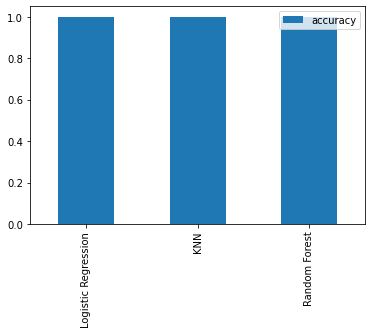

In [100]:
model_compare.T.plot.bar();